# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [2]:
env = gym.make('LunarLander-v2')

random_seed = 10
env.seed(random_seed)

/home/arasdar/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


[10]

Please refer to the instructions in `Deep_Q_Network.ipynb` if you would like to write your own DQN agent.  Otherwise, run the code cell below to load the solution files.

In [3]:
env.observation_space, env.action_space

(Box(8,), Discrete(4))

In [4]:
env.observation_space.shape, env.action_space.shape

((8,), ())

In [5]:
env.observation_space.shape[0], env.action_space.n

(8, 4)

In [7]:
from agent import Agent

agent = Agent(s_size=env.observation_space.shape[0], a_size=env.action_space.n, 
              random_seed=random_seed)

In [8]:
# watch an untrained agent
s = env.reset()
R = 0

for _ in range(20):
    env.render()

    a = agent.act(s)
    s, r, done, _ = env.step(a)
    
    R += r
    
    if done:
        break 
        
    print('total reward:', R)
        
env.close()

total reward: 0.9557930159989894
total reward: 1.8413783459317812
total reward: 0.8331511021291134
total reward: -0.5689336971162335
total reward: -1.7637048420642716
total reward: -2.150763868167576
total reward: -1.8242733692484652
total reward: -3.4016733532196444
total reward: -5.604123787280639
total reward: -8.2442289770417
total reward: -8.102336773515578
total reward: -9.48191976469176
total reward: -11.935987487076456
total reward: -12.204848358583135
total reward: -13.468836950579718
total reward: -14.057654593508367
total reward: -15.762356511832973
total reward: -19.811096852810948
total reward: -22.140823299805493
total reward: -26.55976881122053


### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Alternatively, you can skip to the next step below (**4. Watch a Smart Agent!**), to load the saved model weights from a pre-trained agent.

In [10]:
"""Deep Q-Learning.

Params
======
    n_episodes (int): maximum number of training episodes
    n_steps (int): maximum number of timesteps per episode
    eps_start (float): starting value of epsilon, for epsilon-greedy action selection
    eps_end (float): minimum value of epsilon
    eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
"""
n_episodes=2000
#max_t=1000
R_goal = 200
Rs_deque = deque(maxlen=100)  # last 100 scores
Rs = []                        # list containing mean scores from each episode
meanRs_deque = []

eps_start=1.0
eps_end=0.01
eps_decay=0.995
eps = eps_start                    # initialize epsilon

In [11]:
for i_episode in range(n_episodes):
    s = env.reset()
    
    R = 0
    
    #for _ in range(max_t):
    while True:
        #env.render()
        
        a = agent.act(s, eps)
        
        s2, r, done, _ = env.step(a)
        
        agent.step(s, a, r, s2, done)
        
        s = s2
        R += r
        
        if done:
            break
            
    Rs.append(R)
    Rs_deque.append(R)       # save most recent score
    meanRs_deque.append(np.mean(Rs_deque))
    
    # exploration
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    
    #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode+1, np.mean(Rs_deque)), end="")
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode+1, np.mean(Rs_deque)))
    
    if np.mean(Rs_deque)>=R_goal:
        torch.save(agent.q.state_dict(), 'q-lunarlander.pth')
        break

Episode 1	Average Score: -287.12
Episode 2	Average Score: -246.10
Episode 3	Average Score: -310.01
Episode 4	Average Score: -312.09
Episode 5	Average Score: -292.65
Episode 6	Average Score: -262.10
Episode 7	Average Score: -232.48
Episode 8	Average Score: -213.44
Episode 9	Average Score: -199.42
Episode 10	Average Score: -197.70
Episode 11	Average Score: -207.13
Episode 12	Average Score: -220.39
Episode 13	Average Score: -213.19
Episode 14	Average Score: -210.33
Episode 15	Average Score: -206.33
Episode 16	Average Score: -205.17
Episode 17	Average Score: -207.95
Episode 18	Average Score: -201.08
Episode 19	Average Score: -203.57
Episode 20	Average Score: -198.92
Episode 21	Average Score: -197.73
Episode 22	Average Score: -195.90
Episode 23	Average Score: -194.02
Episode 24	Average Score: -194.84
Episode 25	Average Score: -197.56
Episode 26	Average Score: -194.10
Episode 27	Average Score: -190.03
Episode 28	Average Score: -200.14
Episode 29	Average Score: -198.33
Episode 30	Average Scor

Episode 239	Average Score: -195.65
Episode 240	Average Score: -194.07
Episode 241	Average Score: -189.42
Episode 242	Average Score: -189.70
Episode 243	Average Score: -190.18
Episode 244	Average Score: -192.95
Episode 245	Average Score: -191.36
Episode 246	Average Score: -191.21
Episode 247	Average Score: -191.67
Episode 248	Average Score: -193.33
Episode 249	Average Score: -191.06
Episode 250	Average Score: -190.02
Episode 251	Average Score: -190.39
Episode 252	Average Score: -189.86
Episode 253	Average Score: -189.25
Episode 254	Average Score: -188.72
Episode 255	Average Score: -187.39
Episode 256	Average Score: -186.89
Episode 257	Average Score: -186.09
Episode 258	Average Score: -185.16
Episode 259	Average Score: -183.69
Episode 260	Average Score: -185.56
Episode 261	Average Score: -185.15
Episode 262	Average Score: -179.82
Episode 263	Average Score: -180.79
Episode 264	Average Score: -179.72
Episode 265	Average Score: -180.20
Episode 266	Average Score: -178.90
Episode 267	Average 

Episode 474	Average Score: -70.57
Episode 475	Average Score: -70.51
Episode 476	Average Score: -68.99
Episode 477	Average Score: -68.21
Episode 478	Average Score: -68.34
Episode 479	Average Score: -70.63
Episode 480	Average Score: -69.65
Episode 481	Average Score: -69.68
Episode 482	Average Score: -69.69
Episode 483	Average Score: -72.01
Episode 484	Average Score: -71.54
Episode 485	Average Score: -71.31
Episode 486	Average Score: -70.81
Episode 487	Average Score: -70.74
Episode 488	Average Score: -70.22
Episode 489	Average Score: -70.11
Episode 490	Average Score: -70.08
Episode 491	Average Score: -68.48
Episode 492	Average Score: -67.98
Episode 493	Average Score: -67.63
Episode 494	Average Score: -67.09
Episode 495	Average Score: -66.37
Episode 496	Average Score: -65.56
Episode 497	Average Score: -65.47
Episode 498	Average Score: -64.33
Episode 499	Average Score: -64.11
Episode 500	Average Score: -64.98
Episode 501	Average Score: -66.31
Episode 502	Average Score: -66.79
Episode 503	Av

Episode 712	Average Score: -96.69
Episode 713	Average Score: -96.07
Episode 714	Average Score: -95.86
Episode 715	Average Score: -95.94
Episode 716	Average Score: -95.70
Episode 717	Average Score: -95.58
Episode 718	Average Score: -95.35
Episode 719	Average Score: -94.89
Episode 720	Average Score: -93.49
Episode 721	Average Score: -92.69
Episode 722	Average Score: -92.47
Episode 723	Average Score: -91.49
Episode 724	Average Score: -91.32
Episode 725	Average Score: -90.96
Episode 726	Average Score: -91.35
Episode 727	Average Score: -91.08
Episode 728	Average Score: -91.19
Episode 729	Average Score: -90.93
Episode 730	Average Score: -90.92
Episode 731	Average Score: -90.06
Episode 732	Average Score: -90.22
Episode 733	Average Score: -89.90
Episode 734	Average Score: -89.85
Episode 735	Average Score: -93.02
Episode 736	Average Score: -93.48
Episode 737	Average Score: -93.55
Episode 738	Average Score: -93.11
Episode 739	Average Score: -92.90
Episode 740	Average Score: -93.22
Episode 741	Av

Episode 950	Average Score: -133.30
Episode 951	Average Score: -132.50
Episode 952	Average Score: -132.85
Episode 953	Average Score: -132.77
Episode 954	Average Score: -132.13
Episode 955	Average Score: -129.84
Episode 956	Average Score: -130.31
Episode 957	Average Score: -129.49
Episode 958	Average Score: -128.36
Episode 959	Average Score: -127.72
Episode 960	Average Score: -126.88
Episode 961	Average Score: -127.04
Episode 962	Average Score: -124.20
Episode 963	Average Score: -123.00
Episode 964	Average Score: -122.41
Episode 965	Average Score: -121.71
Episode 966	Average Score: -121.40
Episode 967	Average Score: -121.17
Episode 968	Average Score: -120.78
Episode 969	Average Score: -119.51
Episode 970	Average Score: -119.45
Episode 971	Average Score: -119.69
Episode 972	Average Score: -119.52
Episode 973	Average Score: -118.14
Episode 974	Average Score: -117.98
Episode 975	Average Score: -118.45
Episode 976	Average Score: -117.82
Episode 977	Average Score: -116.96
Episode 978	Average 

Episode 1183	Average Score: -107.47
Episode 1184	Average Score: -104.97
Episode 1185	Average Score: -105.81
Episode 1186	Average Score: -106.99
Episode 1187	Average Score: -108.06
Episode 1188	Average Score: -107.50
Episode 1189	Average Score: -114.21
Episode 1190	Average Score: -114.88
Episode 1191	Average Score: -114.19
Episode 1192	Average Score: -114.91
Episode 1193	Average Score: -114.70
Episode 1194	Average Score: -115.36
Episode 1195	Average Score: -116.46
Episode 1196	Average Score: -115.03
Episode 1197	Average Score: -112.64
Episode 1198	Average Score: -111.97
Episode 1199	Average Score: -112.06
Episode 1200	Average Score: -109.98
Episode 1201	Average Score: -109.41
Episode 1202	Average Score: -108.30
Episode 1203	Average Score: -108.15
Episode 1204	Average Score: -106.19
Episode 1205	Average Score: -105.48
Episode 1206	Average Score: -105.46
Episode 1207	Average Score: -101.78
Episode 1208	Average Score: -101.01
Episode 1209	Average Score: -102.20
Episode 1210	Average Score: 

Episode 1416	Average Score: -104.80
Episode 1417	Average Score: -106.54
Episode 1418	Average Score: -106.60
Episode 1419	Average Score: -106.36
Episode 1420	Average Score: -107.07
Episode 1421	Average Score: -106.76
Episode 1422	Average Score: -106.94
Episode 1423	Average Score: -106.67
Episode 1424	Average Score: -106.28
Episode 1425	Average Score: -109.06
Episode 1426	Average Score: -112.38
Episode 1427	Average Score: -112.65
Episode 1428	Average Score: -112.97
Episode 1429	Average Score: -112.10
Episode 1430	Average Score: -111.85
Episode 1431	Average Score: -111.56
Episode 1432	Average Score: -112.04
Episode 1433	Average Score: -111.57
Episode 1434	Average Score: -113.21
Episode 1435	Average Score: -113.25
Episode 1436	Average Score: -112.93
Episode 1437	Average Score: -115.06
Episode 1438	Average Score: -115.36
Episode 1439	Average Score: -114.44
Episode 1440	Average Score: -114.00
Episode 1441	Average Score: -116.77
Episode 1442	Average Score: -116.75
Episode 1443	Average Score: 

Episode 1647	Average Score: -94.28
Episode 1648	Average Score: -94.05
Episode 1649	Average Score: -93.35
Episode 1650	Average Score: -94.78
Episode 1651	Average Score: -94.38
Episode 1652	Average Score: -92.88
Episode 1653	Average Score: -92.03
Episode 1654	Average Score: -90.86
Episode 1655	Average Score: -90.32
Episode 1656	Average Score: -89.90
Episode 1657	Average Score: -89.24
Episode 1658	Average Score: -87.59
Episode 1659	Average Score: -86.15
Episode 1660	Average Score: -84.48
Episode 1661	Average Score: -82.51
Episode 1662	Average Score: -83.43
Episode 1663	Average Score: -82.88
Episode 1664	Average Score: -82.60
Episode 1665	Average Score: -81.50
Episode 1666	Average Score: -80.58
Episode 1667	Average Score: -79.99
Episode 1668	Average Score: -79.92
Episode 1669	Average Score: -79.87
Episode 1670	Average Score: -79.77
Episode 1671	Average Score: -80.20
Episode 1672	Average Score: -82.56
Episode 1673	Average Score: -81.77
Episode 1674	Average Score: -83.47
Episode 1675	Average

Episode 1880	Average Score: -40.74
Episode 1881	Average Score: -43.43
Episode 1882	Average Score: -43.82
Episode 1883	Average Score: -45.32
Episode 1884	Average Score: -45.39
Episode 1885	Average Score: -46.40
Episode 1886	Average Score: -45.37
Episode 1887	Average Score: -46.52
Episode 1888	Average Score: -48.99
Episode 1889	Average Score: -52.56
Episode 1890	Average Score: -53.31
Episode 1891	Average Score: -53.64
Episode 1892	Average Score: -53.66
Episode 1893	Average Score: -54.78
Episode 1894	Average Score: -55.40
Episode 1895	Average Score: -56.70
Episode 1896	Average Score: -56.88
Episode 1897	Average Score: -57.92
Episode 1898	Average Score: -59.17
Episode 1899	Average Score: -62.67
Episode 1900	Average Score: -62.32
Episode 1901	Average Score: -62.84
Episode 1902	Average Score: -62.76
Episode 1903	Average Score: -63.50
Episode 1904	Average Score: -64.30
Episode 1905	Average Score: -65.28
Episode 1906	Average Score: -65.74
Episode 1907	Average Score: -68.52
Episode 1908	Average

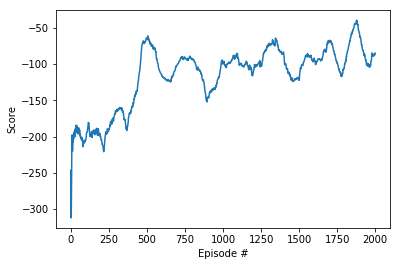

In [13]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(meanRs_deque)), meanRs_deque)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

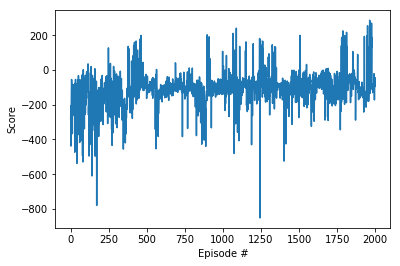

In [12]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(Rs)), Rs)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

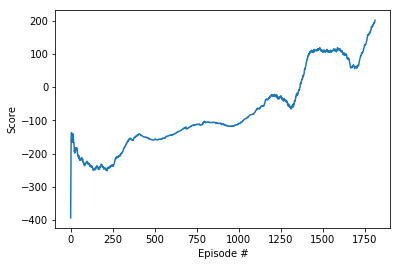

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(Rs)), Rs)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

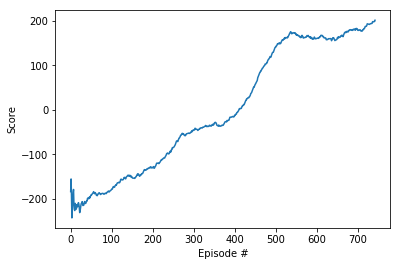

In [8]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(Rs)), Rs)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

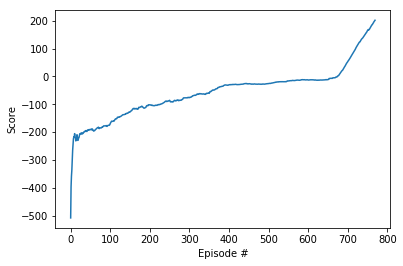

In [25]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: -225.00
Episode 200	Average Score: -176.93
Episode 300	Average Score: -87.32
Episode 400	Average Score: -56.19
Episode 500	Average Score: -66.67
Episode 600	Average Score: -42.52
Episode 700	Average Score: 36.50
Episode 800	Average Score: 48.18
Episode 900	Average Score: 155.64
Episode 1000	Average Score: 191.26
Episode 1100	Average Score: 185.16
Episode 1200	Average Score: 180.23
Episode 1300	Average Score: 184.97
Episode 1400	Average Score: 188.67
Episode 1500	Average Score: 181.42
Episode 1600	Average Score: 199.10
Episode 1604	Average Score: 200.17
Environment solved in 1504 episodes!	Average Score: 200.17


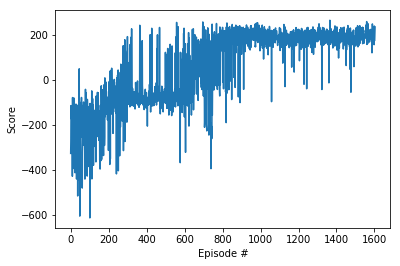

In [3]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [13]:
# load the weights from file
agent.q.load_state_dict(torch.load('q-lunarlander.pth'))

# for i in range(3):
s = env.reset()
R = 0 # total reward

#for j in range(200):
while True:
    env.render()

    a = agent.act(s)

    s, r, done, _ = env.step(a)
    
    R += r

    if done:
        break

print('total reward:{:.2f}'.format(R))            
env.close()

total reward:215.92


### 5. Explore

In this exercise, you have implemented a DQN agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task with discrete actions!
- You may like to implement some improvements such as prioritized experience replay, Double DQN, or Dueling DQN! 
- Write a blog post explaining the intuition behind the DQN algorithm and demonstrating how to use it to solve an RL environment of your choosing.  